In [8]:
import sys
sys.path.append("../")

In [8]:

import scipy
from scipy import special

import delay.calculator as calc
from delay.delay import *

In [18]:
def checkA(current):
    if current > N/2:
        return True
    return False

In [19]:
def checkB(current):
    if current < N/2:
        return True
    return False

In [21]:
def fA(x):
    return N/2 if 0 <= x <= N/2 else N-x

def fB(x):
    return x if 0 <= x <= N/2 else N/2

differenceCurrentPreviousStatesA = []
differenceCurrentPreviousStatesB = []
differenceCurrentPreviousValuesA = []
differenceCurrentPreviousValuesB = []
def simulate():
    def nextElem(func):
        term = 0 if func == max else N
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        if checkA(x[current]):
            differenceCurrentPreviousStatesA.append(x[current] - x[current - tauA])
            rA = fA(x[current]) - previousA
            differenceCurrentPreviousValuesA.append(rA)
        if checkB(x[current]):
            differenceCurrentPreviousStatesB.append(x[current] - x[current - tauB])
            rB = fB(x[current]) - previousB
            differenceCurrentPreviousValuesB.append(rB)
            
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

In [9]:
def P(n, r, p):
    if (n+r)%2:
        return 0.0
    if not (0 <= 1/2*(n+r) <= n):
        return 0.0
    w = 1/2*(n+r)
    return scipy.special.binom(n, w) * p**w * p**(1/2*(n-r))

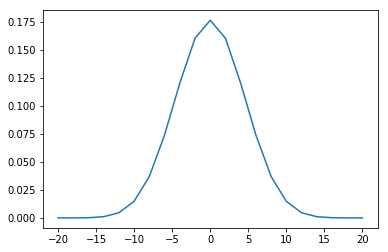

In [10]:
vP = np.vectorize(P)

inp = np.linspace(-20, 20, num = 21)

y = vP(20, inp, 1/2)

plt.plot(inp, y);


µ =  46.94820831707961
[      0  635917       0  984547       0 1261961       7 1317267       4
 1120933       1]


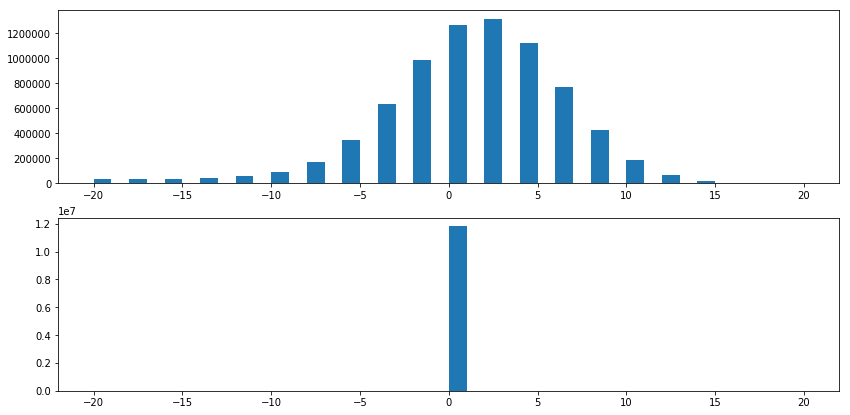

In [16]:
N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 100000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
differenceCurrentPreviousValuesA = []
differenceCurrentPreviousValuesB = []

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))
print('µ = ', np.mean(x[100*conv:]))
print(np.array(bins[15:26]).astype(int))

[   7480   99598   14285  137770   23650 1306145       0   98889       0
   64238       0]
[  7432 100202  13988 138748  23303 721078      0  99697      0  64468
      0]
µ =  49.991155369717205


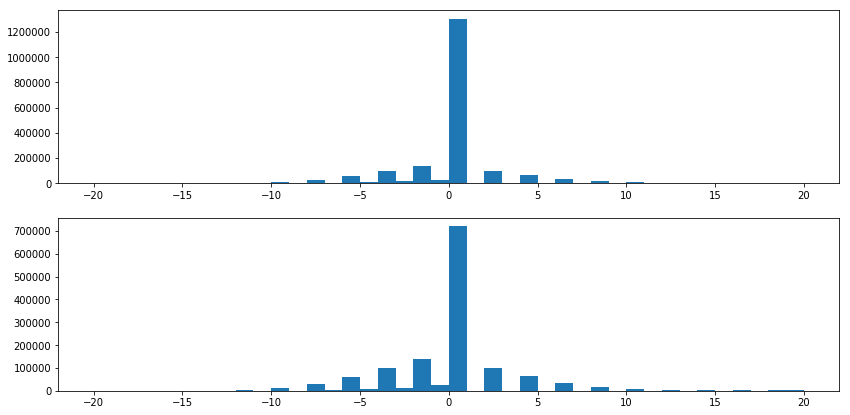

In [50]:
N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousValuesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousB, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))


[      0  668038       0 1035061       0 1325576      15 1383667       6
 1176664       1]
[    0 55584     0 64828     0 62436     0 49327     0 31686     0]
µ =  50.117922876190754


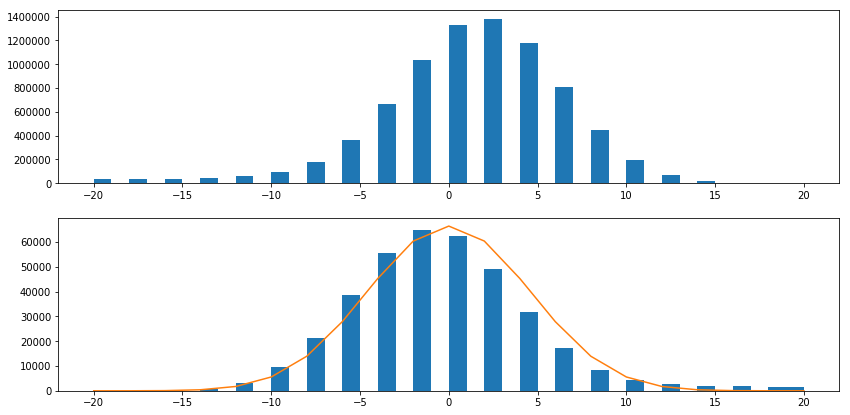

In [17]:
N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[   0 3326    0 4589    0 5075    3 4675    0 3403    0]
[   0 3547    0 4808    0 5047    0 4420    0 3005    0]
µ =  50.15753250845091


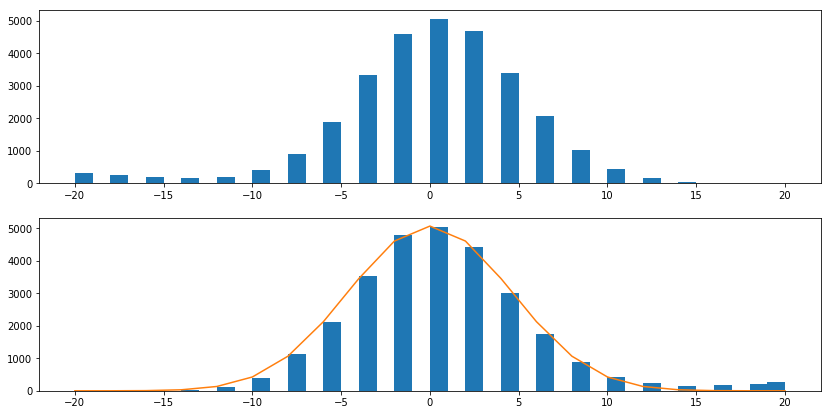

In [22]:
def checkA(current):
    if current == N/2+1:
        return True
    return False
def checkB(current):
    if current == N/2-1:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[    0  6357     0  8693     0 39858     3  9236     0  6792     0]
[   0 3546    0 5018    0 5267    0 4449    0 3098    0]
µ =  49.646689658048835


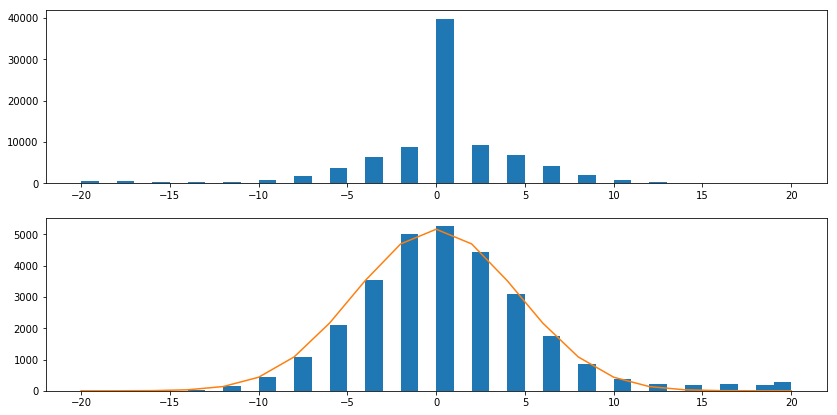

In [23]:
def checkA(current):
    if current == N/2+2:
        return True
    return False
def checkB(current):
    if current == N/2-2:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[    0  9237     0 12776     0 73657     3 13694     0 10203     0]
[   0 3334    0 4358    0 4672    0 4044    0 2831    0]
µ =  50.06767416022243


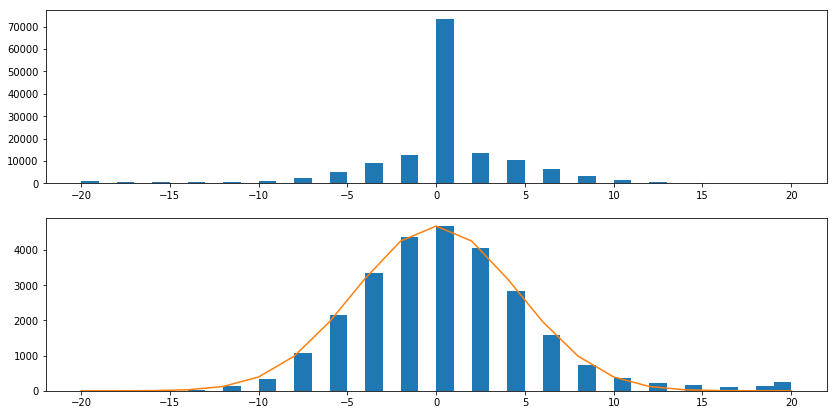

In [24]:
def checkA(current):
    if current == N/2+3:
        return True
    return False
def checkB(current):
    if current == N/2-3:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  11780      0  16531      0 106400      3  17997      0  13456
      0]
[   0 3684    0 4443    0 4721    0 4038    0 2744    0]
µ =  49.86607025755005


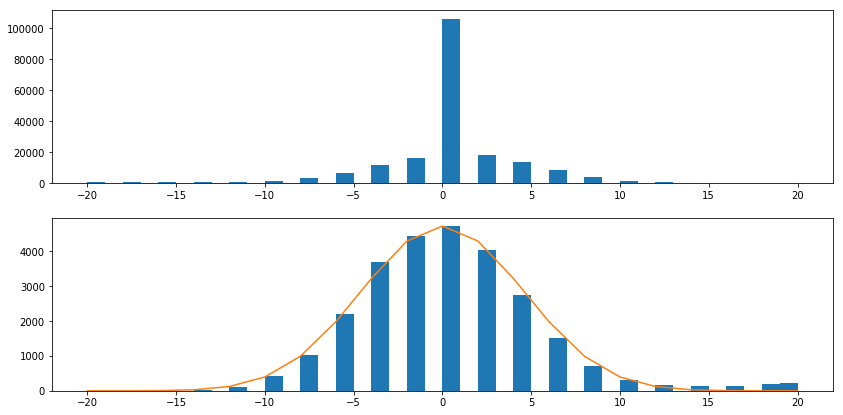

In [25]:
def checkA(current):
    if current == N/2+4:
        return True
    return False
def checkB(current):
    if current == N/2-4:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  14237      0  20116      0 140023      3  22420      0  16659
      0]
[   0 3313    0 4092    0 4420    0 3767    0 2667    0]
µ =  49.88187109583266


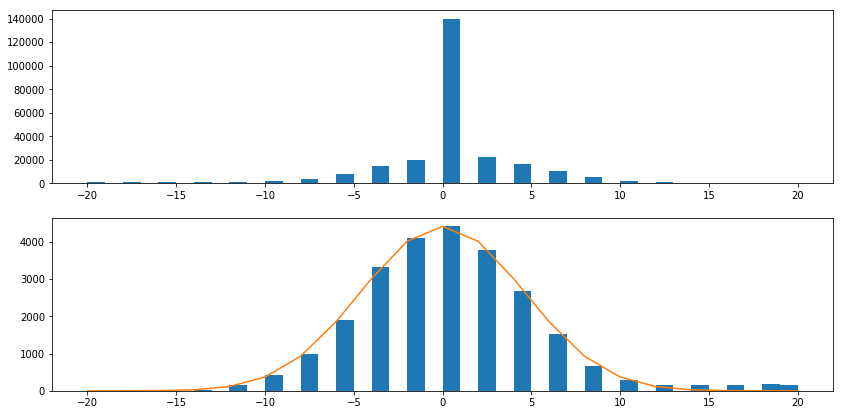

In [26]:
def checkA(current):
    if current == N/2+5:
        return True
    return False
def checkB(current):
    if current == N/2-5:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  16728      0  23940      0 172971      3  26890      0  20195
      1]
[   0 3337    0 4319    0 4255    0 3874    0 2545    0]
µ =  49.96413354431938


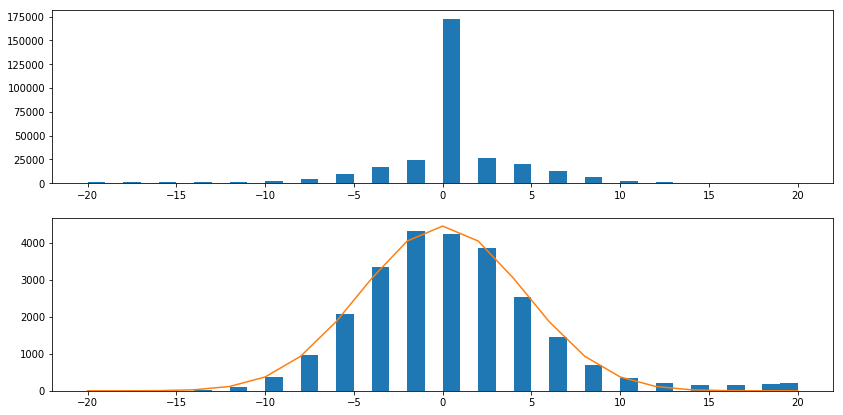

In [27]:
def checkA(current):
    if current == N/2+5:
        return True
    return False
def checkB(current):
    if current == N/2-5:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  19182      0  27418      0 205556      3  30952      0  23529
      1]
[   0 3629    0 4408    0 4382    0 3440    0 2396    0]
µ =  50.116888716249726


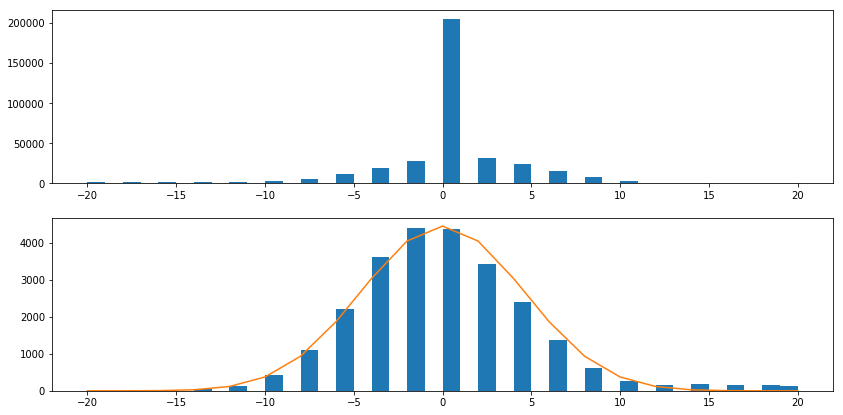

In [28]:
def checkA(current):
    if current == N/2+6:
        return True
    return False
def checkB(current):
    if current == N/2-6:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  21370      0  30787      0 237137      3  34952      0  26711
      1]
[   0 3210    0 4154    0 4133    0 3349    0 2179    0]
µ =  49.97900172912748


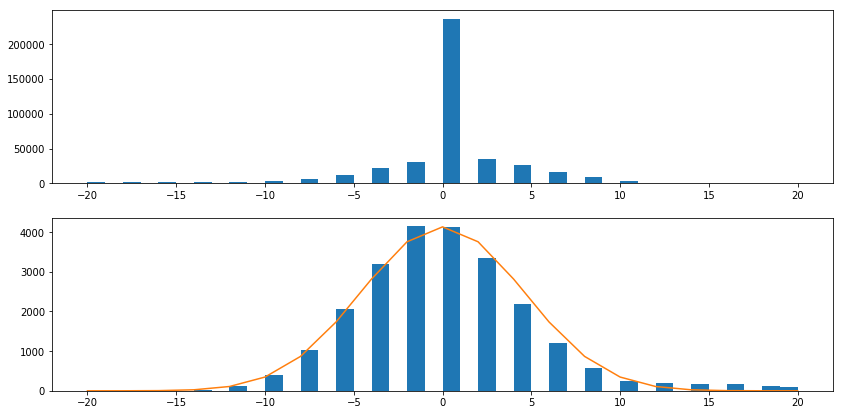

In [29]:
def checkA(current):
    if current == N/2+7:
        return True
    return False
def checkB(current):
    if current == N/2-7:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  23306      0  33649      0 269278      3  38638      0  29813
      1]
[   0 3079    0 3877    0 3897    0 3109    0 2018    0]
µ =  49.91610490542562


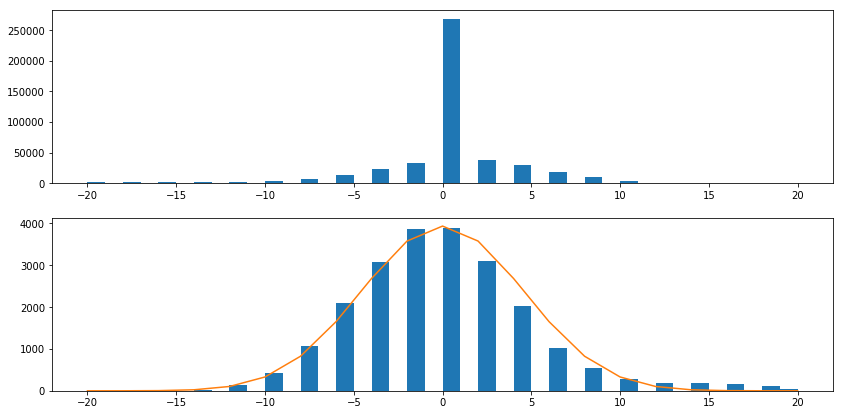

In [30]:
def checkA(current):
    if current == N/2+8:
        return True
    return False
def checkB(current):
    if current == N/2-8:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  25115      0  36431      0 301753      3  42199      0  32779
      1]
[   0 3112    0 3904    0 3690    0 2880    0 1916    0]
µ =  49.90148897926203


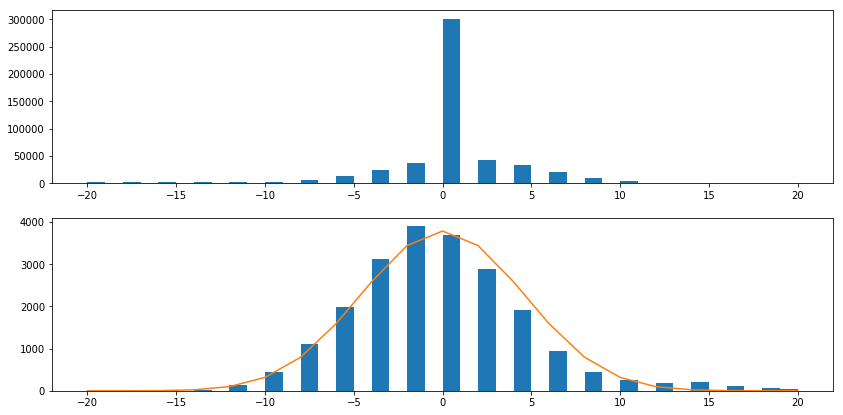

In [31]:
def checkA(current):
    if current == N/2+9:
        return True
    return False
def checkB(current):
    if current == N/2-9:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[   0 1613    0 2597    0 3424    0 3588    0 3018    0]
[   0 2966    0 3724    0 3487    0 2782    0 1792    0]
µ =  49.819541100320045


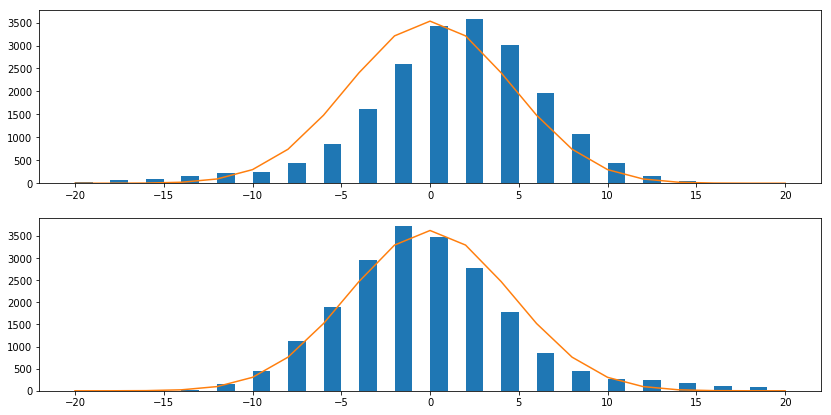

In [46]:
def checkA(current):
    if current == N/2+10:
        return True
    return False
def checkB(current):
    if current == N/2-10:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

s = np.sum(bins)
yd = y * s
ax1.plot(inp, yd);

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

s = np.sum(bins)
yd = y * s
ax2.plot(inp, yd);

[     0  28318      0  41531      0 365190      3  48997      0  38319
      1]
[   0 2873    0 3512    0 3311    0 2491    0 1554    0]
µ =  49.75134885511258


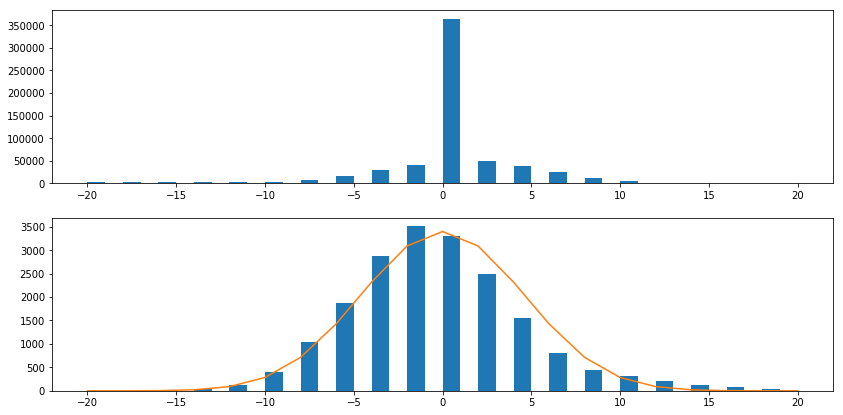

In [33]:
def checkA(current):
    if current == N/2+11:
        return True
    return False
def checkB(current):
    if current == N/2-11:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  29558      0  43606      0 396075      3  52016      0  40896
      1]
[   0 2520    0 3123    0 2895    0 2245    0 1276    0]
µ =  50.0118325384506


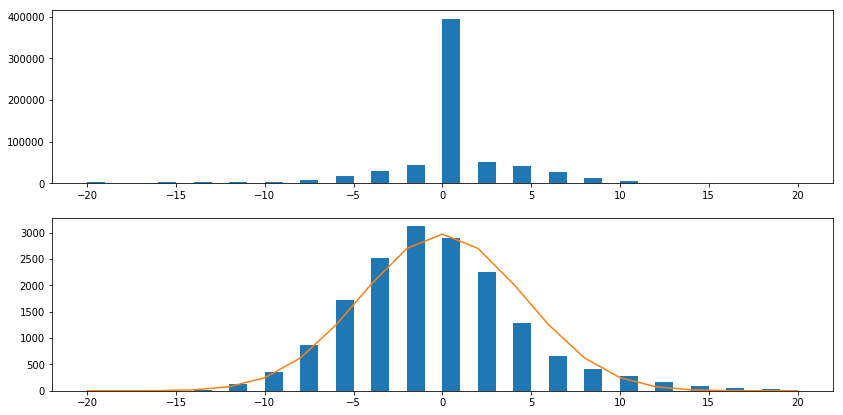

In [34]:
def checkA(current):
    if current == N/2+12:
        return True
    return False
def checkB(current):
    if current == N/2-12:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  30664      0  45506      0 427832      3  54828      0  43234
      1]
[   0 2501    0 2737    0 2582    0 1954    0 1114    0]
µ =  49.96468328726179


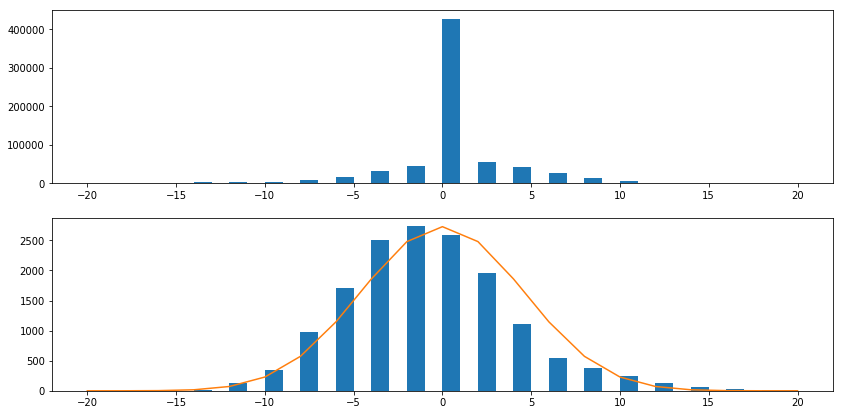

In [35]:
def checkA(current):
    if current == N/2+13:
        return True
    return False
def checkB(current):
    if current == N/2-13:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  31616      0  47260      0 459634      3  57541      0  45609
      1]
[   0 2301    0 2504    0 2375    0 1642    0 1016    0]
µ =  50.24989635787763


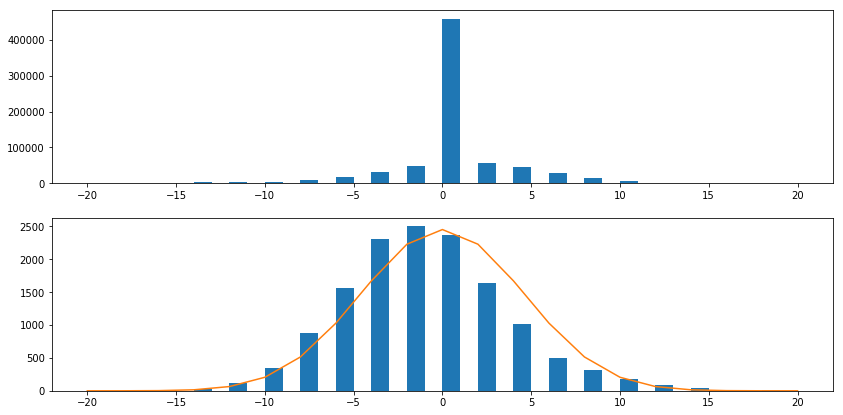

In [36]:
def checkA(current):
    if current == N/2+14:
        return True
    return False
def checkB(current):
    if current == N/2-14:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  32484      0  48838      0 492065      3  60193      0  47844
      1]
[   0 1974    0 2126    0 1973    0 1348    0  722    0]
µ =  50.3229357881148


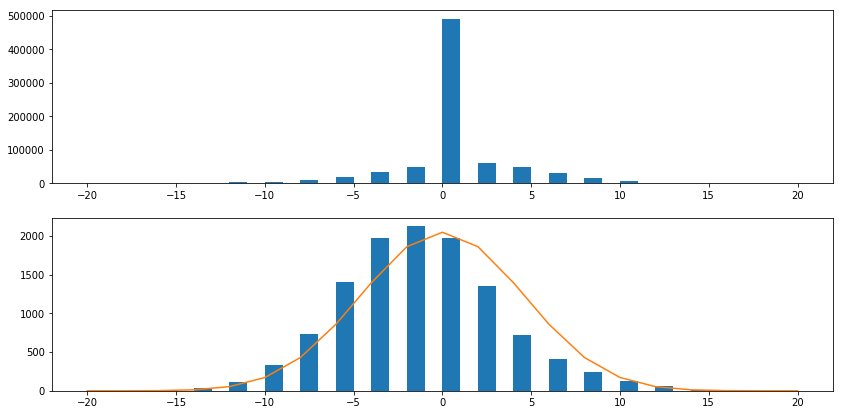

In [37]:
def checkA(current):
    if current == N/2+15:
        return True
    return False
def checkB(current):
    if current == N/2-15:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  33182      0  50136      0 523626      3  62276      0  49721
      1]
[   0 2230    0 2274    0 1918    0 1187    0  707    0]
µ =  49.76809943211654


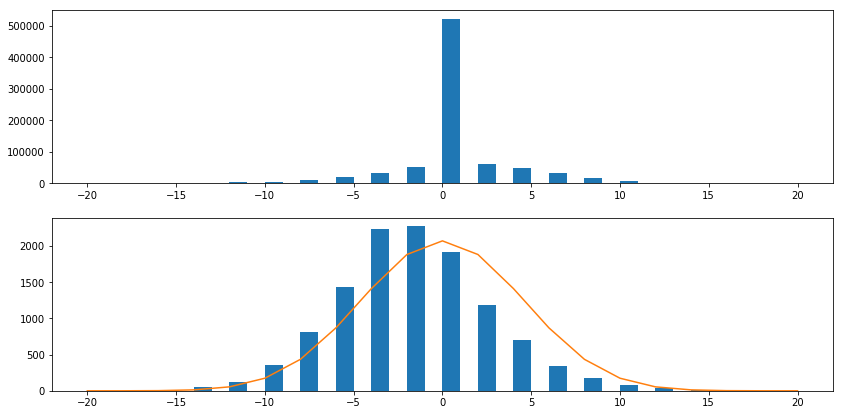

In [38]:
def checkA(current):
    if current == N/2+16:
        return True
    return False
def checkB(current):
    if current == N/2-16:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

In [106]:
print(2230 + 2274) 
print(np.sum([ 1918  ,  0, 1187  , 0 , 707 ,   0]))

4504
3812


[     0  33664      0  51038      0 553066      3  64024      0  51480
      1]
[   0 1767    0 1866    0 1491    0  957    0  481    0]
µ =  49.9976346983273


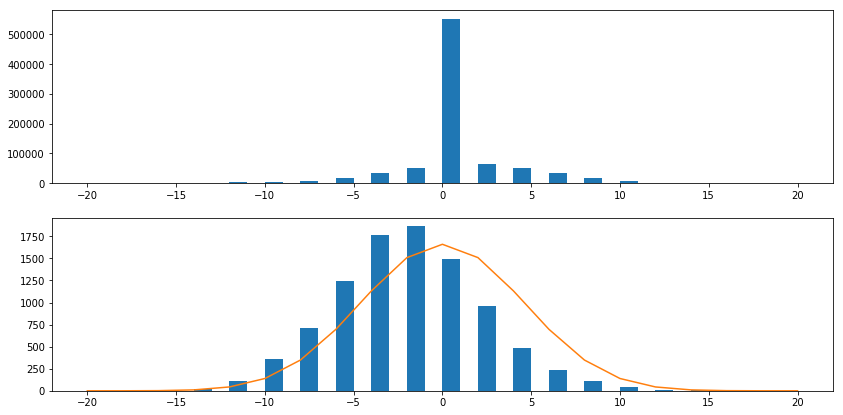

In [39]:
def checkA(current):
    if current == N/2+17:
        return True
    return False
def checkB(current):
    if current == N/2-17:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  34027      0  51779      0 583157      3  65548      0  53105
      1]
[   0 1475    0 1484    0 1076    0  597    0  336    0]
µ =  50.21364548414313


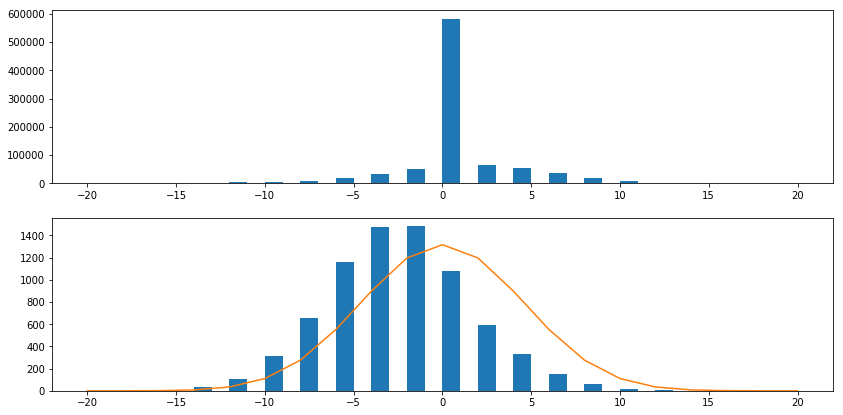

In [40]:
def checkA(current):
    if current == N/2+18:
        return True
    return False
def checkB(current):
    if current == N/2-18:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  34248      0  52238      0 613511      3  66797      0  54466
      1]
[   0 1388    0 1403    0  946    0  440    0  203    0]
µ =  49.91128586080247


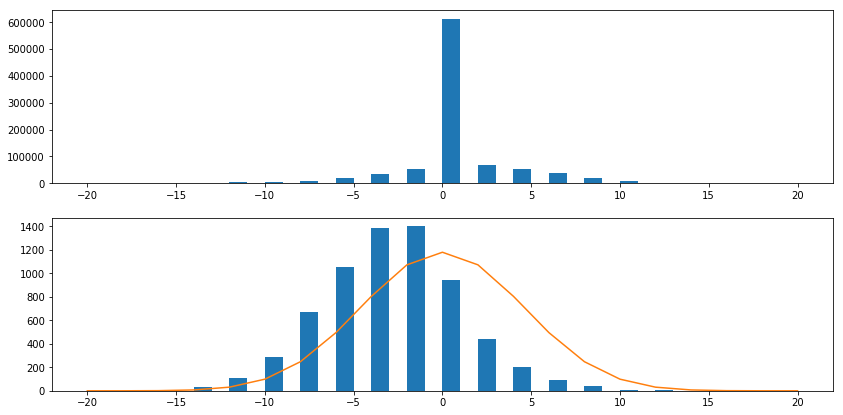

In [41]:
def checkA(current):
    if current == N/2+19:
        return True
    return False
def checkB(current):
    if current == N/2-19:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  34368      0  52566      0 642409      3  67919      0  55709
      1]
[   0 1229    0 1146    0  729    0  306    0  115    0]
µ =  50.07138567884459


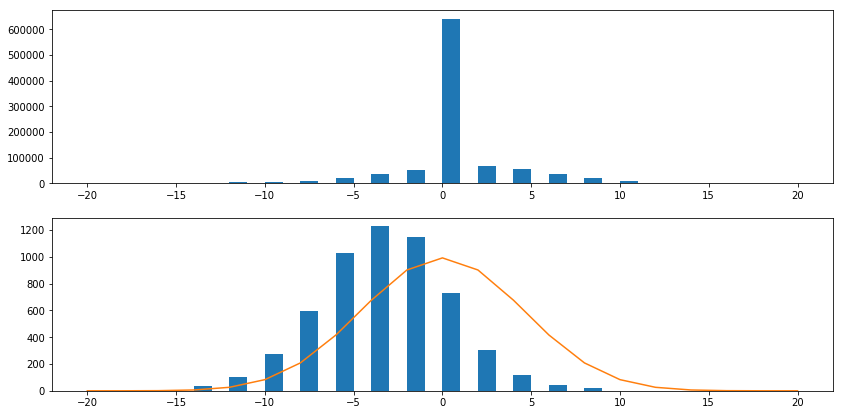

In [42]:
def checkA(current):
    if current == N/2+20:
        return True
    return False
def checkB(current):
    if current == N/2-20:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousValuesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[     0  34430      0  52720      0 671389      3  68625      0  56685
      1]
[  0 911   0 686   0 371   0 165   0  59   0]
µ =  49.98819459694144


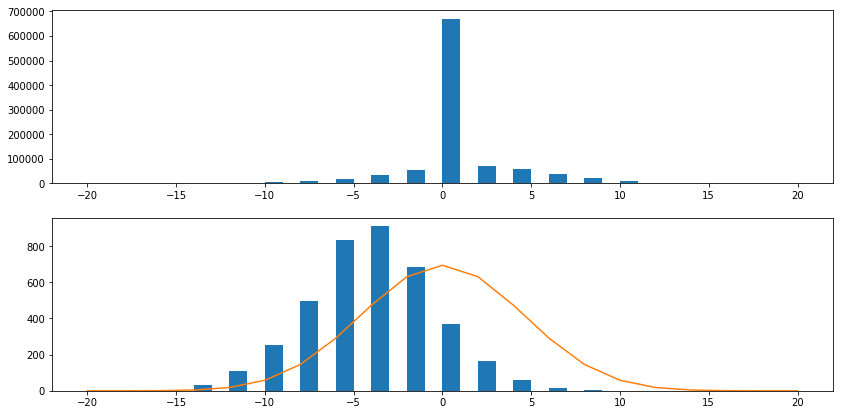

In [43]:
def checkA(current):
    if current == N/2+21:
        return True
    return False
def checkB(current):
    if current == N/2-21:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[  0  29   0  75   0 211   0 478   0 776   0]
[  0 815   0 531   0 233   0  69   0  32   0]
µ =  49.87217471574421


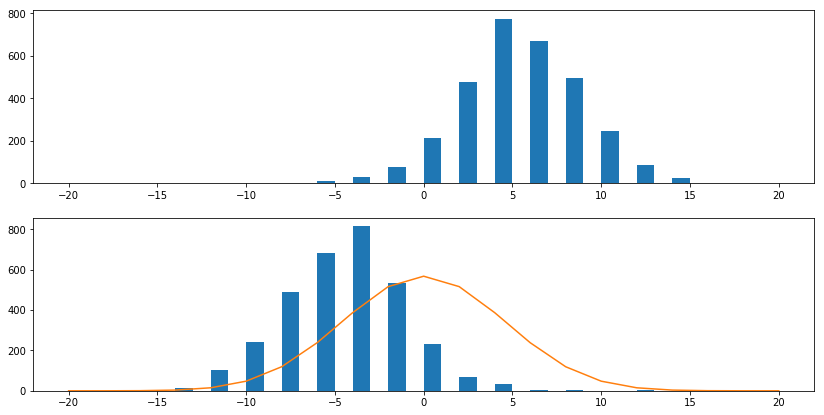

In [47]:
def checkA(current):
    if current == N/2+22:
        return True
    return False
def checkB(current):
    if current == N/2-22:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[  0  12   0  37   0 117   0 313   0 612   0]
[  0 607   0 342   0 109   0  30   0  10   0]
µ =  50.124649438372764


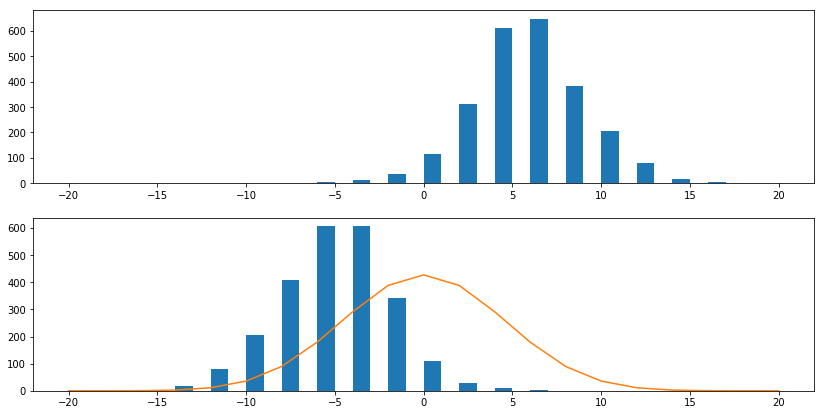

In [48]:
def checkA(current):
    if current == N/2+23:
        return True
    return False
def checkB(current):
    if current == N/2-23:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[  0   5   0  23   0  53   0 157   0 380   0]
[  0 348   0 135   0  44   0  13   0   3   0]
µ =  50.20031798659411


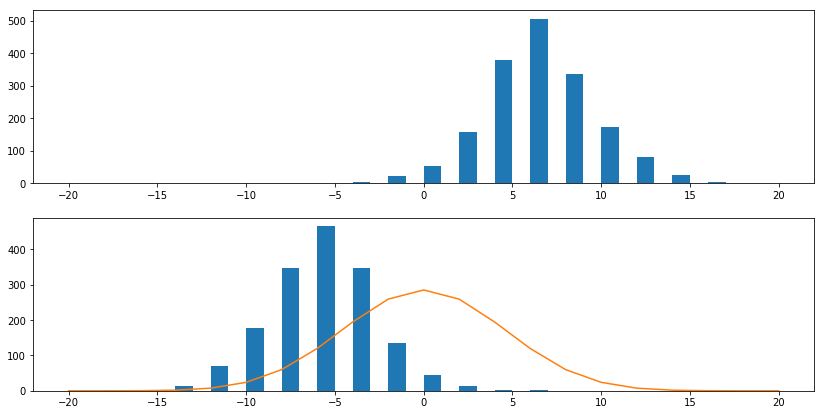

In [49]:
def checkA(current):
    if current == N/2+24:
        return True
    return False
def checkB(current):
    if current == N/2-24:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[  0   0   0   8   0  18   0  70   0 216   0]
[  0 202   0  67   0  21   0   5   0   1   0]
µ =  49.955164794743375


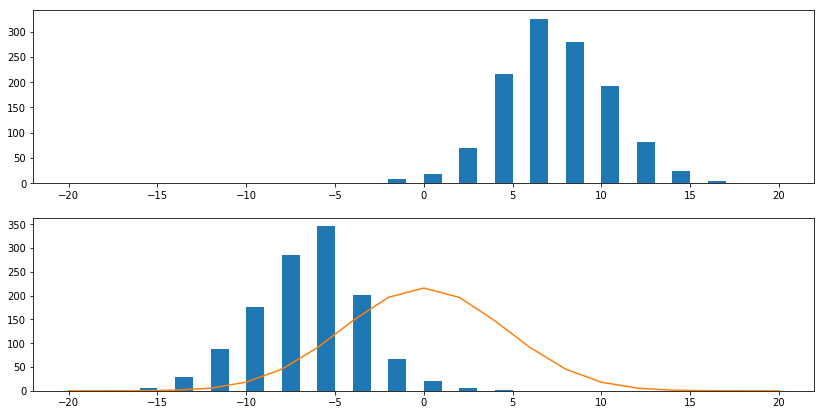

In [50]:
def checkA(current):
    if current == N/2+25:
        return True
    return False
def checkB(current):
    if current == N/2-25:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[ 0  1  0  1  0 10  0 18  0 85  0]
[ 0 73  0 28  0 11  0  2  0  2  0]
µ =  49.79243485370255


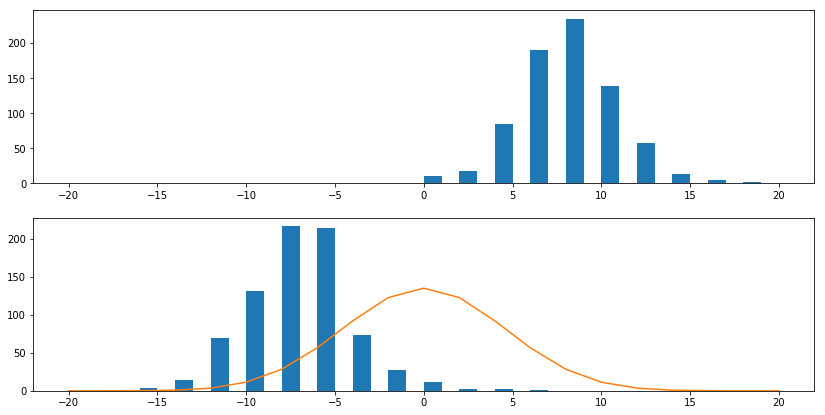

In [51]:
def checkA(current):
    if current == N/2+26:
        return True
    return False
def checkB(current):
    if current == N/2-26:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[ 0  0  0  0  0  3  0  9  0 25  0]
[ 0 30  0  7  0  0  0  0  0  0  0]
µ =  50.105197382339185


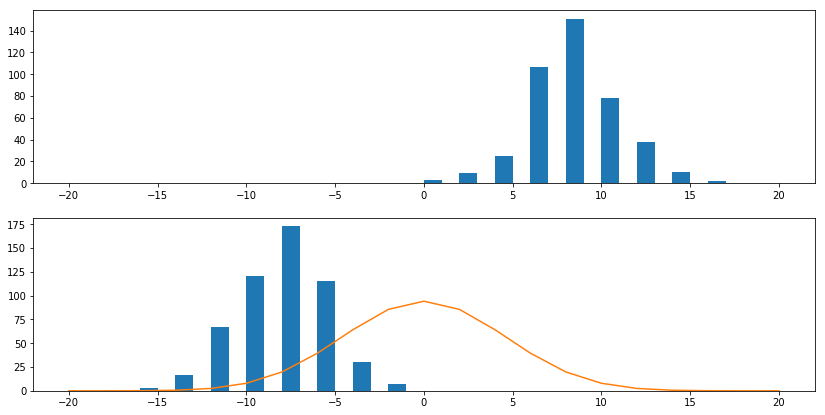

In [52]:
def checkA(current):
    if current == N/2+27:
        return True
    return False
def checkB(current):
    if current == N/2-27:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 2 0 2 0 9 0]
[0 6 0 3 0 1 0 0 0 0 0]
µ =  49.867434062253615


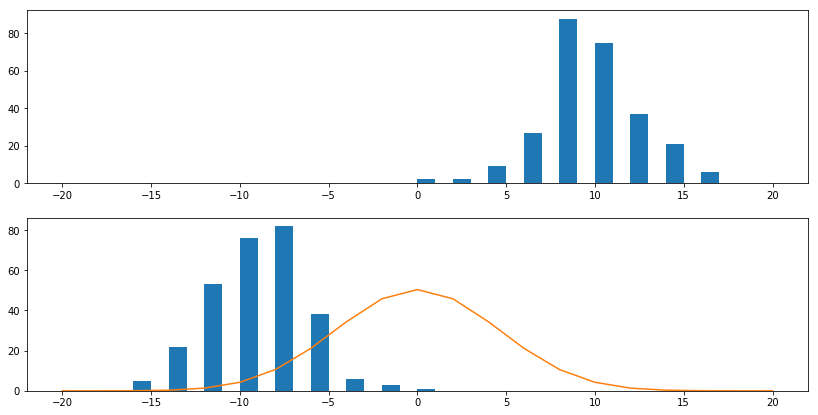

In [53]:
def checkA(current):
    if current == N/2+28:
        return True
    return False
def checkB(current):
    if current == N/2-28:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 1 0 2 0 3 0]
[0 4 0 1 0 0 0 0 0 0 0]
µ =  49.45549871081762


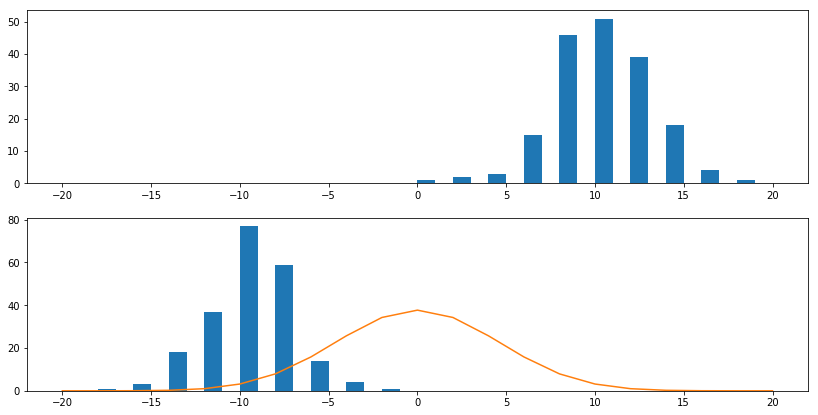

In [54]:
def checkA(current):
    if current == N/2+29:
        return True
    return False
def checkB(current):
    if current == N/2-29:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0 0 0]
µ =  49.82480235133197


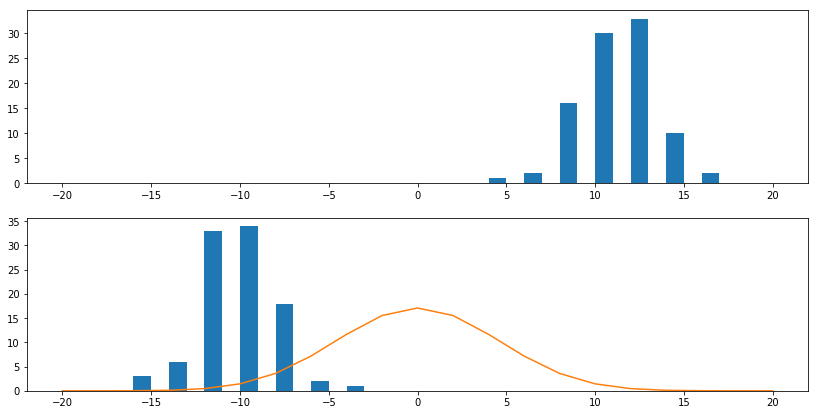

In [55]:
def checkA(current):
    if current == N/2+30:
        return True
    return False
def checkB(current):
    if current == N/2-30:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  49.919827479207505


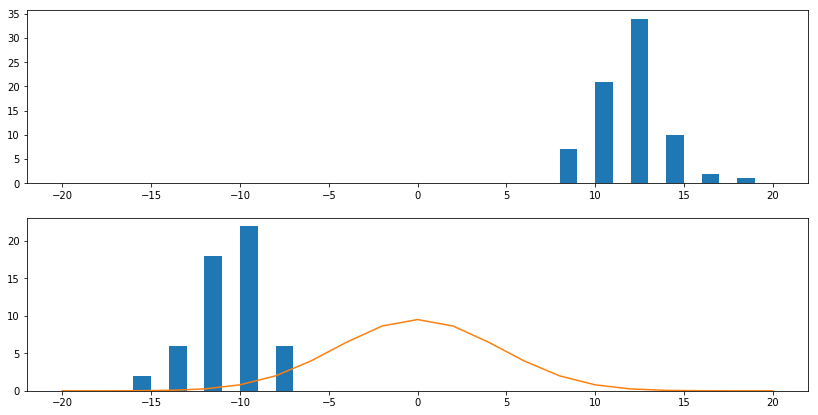

In [56]:
def checkA(current):
    if current == N/2+31:
        return True
    return False
def checkB(current):
    if current == N/2-31:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  50.14868235058826


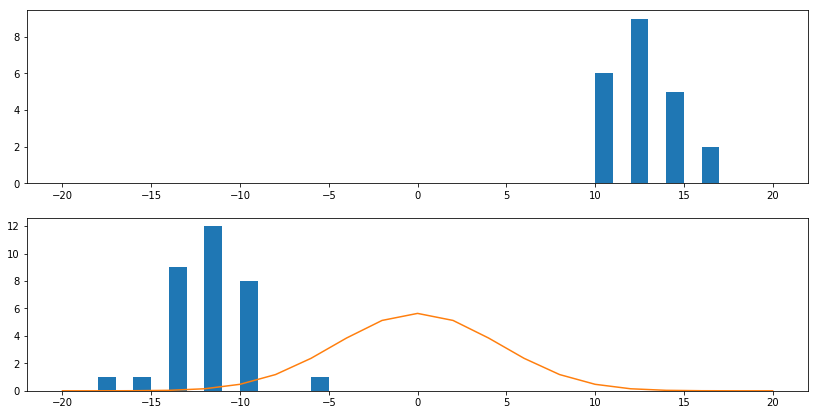

In [57]:
def checkA(current):
    if current == N/2+32:
        return True
    return False
def checkB(current):
    if current == N/2-32:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  49.852763865305946


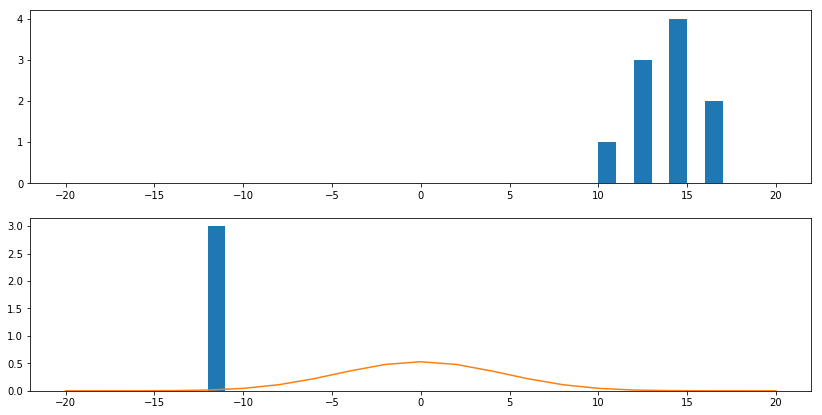

In [58]:
def checkA(current):
    if current == N/2+33:
        return True
    return False
def checkB(current):
    if current == N/2-33:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  50.014195327587


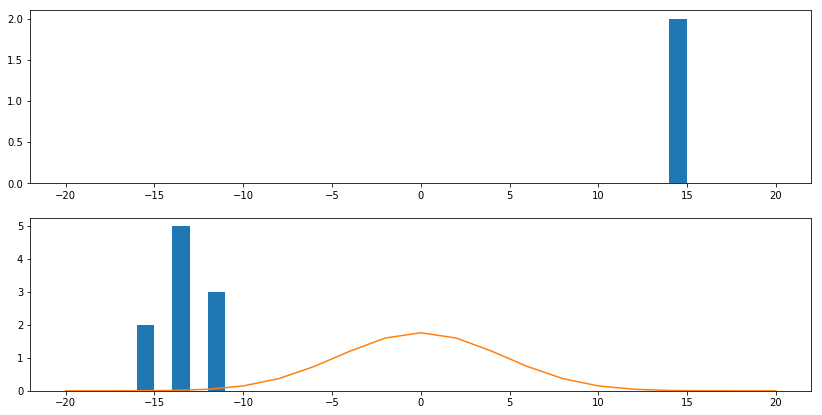

In [59]:
def checkA(current):
    if current == N/2+34:
        return True
    return False
def checkB(current):
    if current == N/2-34:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  50.21190379398006


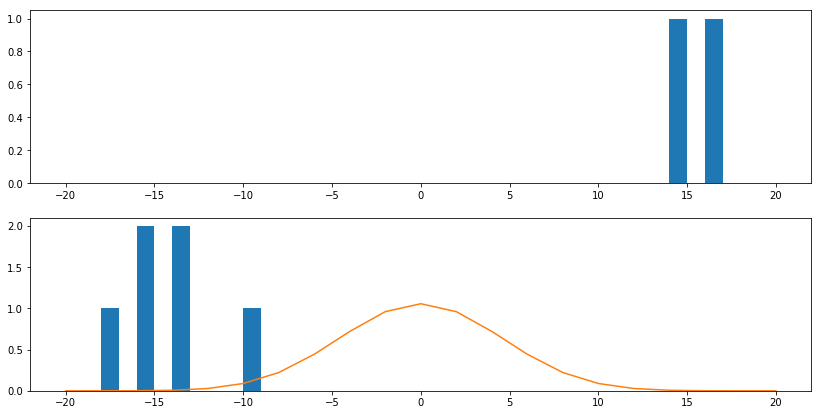

In [60]:
def checkA(current):
    if current == N/2+35:
        return True
    return False
def checkB(current):
    if current == N/2-35:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  49.981764514042816


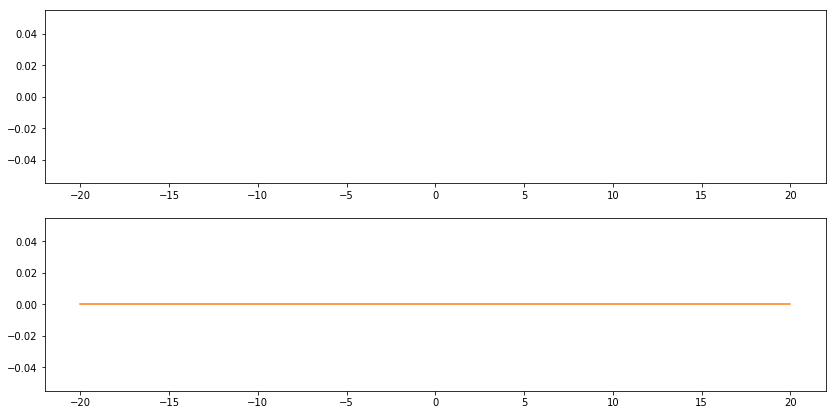

In [61]:
def checkA(current):
    if current == N/2+36:
        return True
    return False
def checkB(current):
    if current == N/2-36:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  50.34867621999969


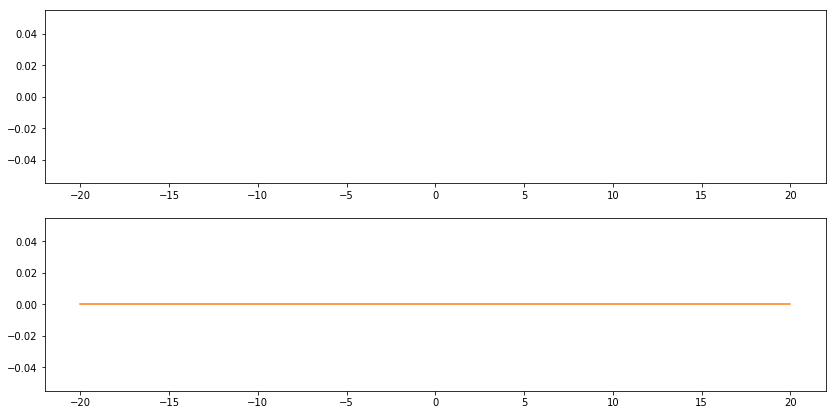

In [62]:
def checkA(current):
    if current == N/2+37:
        return True
    return False
def checkB(current):
    if current == N/2-37:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  49.82061345081283


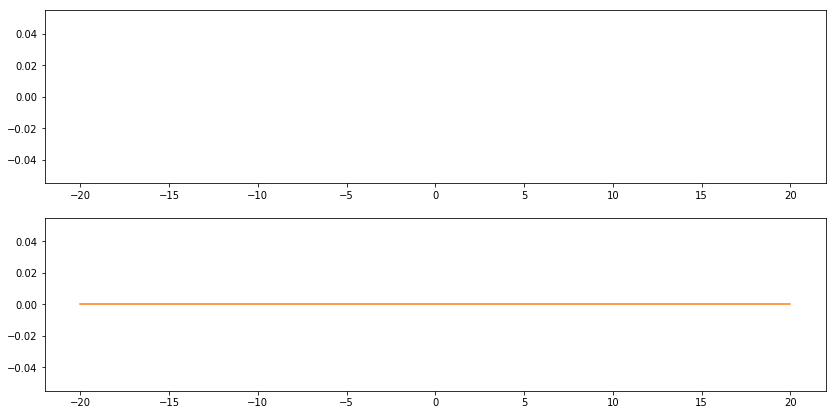

In [63]:
def checkA(current):
    if current == N/2+38:
        return True
    return False
def checkB(current):
    if current == N/2-38:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  50.05925716361787


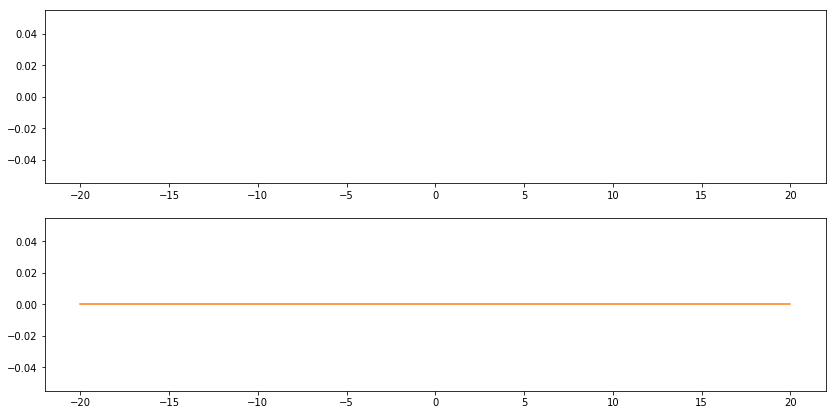

In [64]:
def checkA(current):
    if current == N/2+39:
        return True
    return False
def checkB(current):
    if current == N/2-39:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
µ =  49.94370461417241


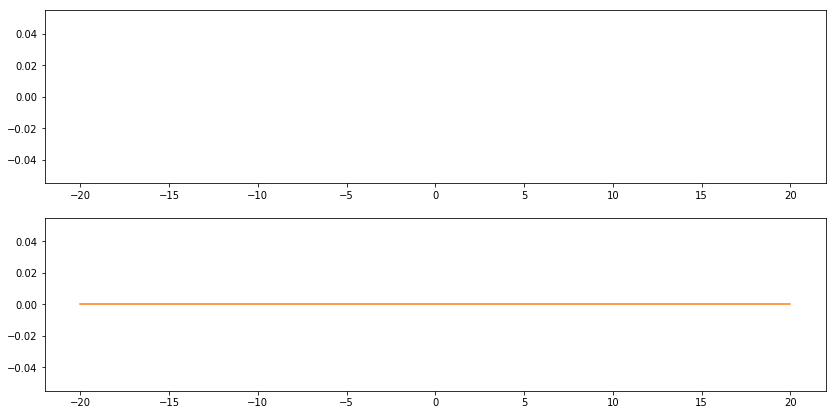

In [65]:
def checkA(current):
    if current == N/2+40:
        return True
    return False
def checkB(current):
    if current == N/2-40:
        return True
    return False

N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 10000 * N
conv = N

calculateProbability = calc.step()

m = max(tauA, tauB) # m = 20
            
_, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

tauA, tauB = 20, 0
differenceCurrentPreviousStatesA = []
simulate()
(bins, _, _) = ax1.hist(differenceCurrentPreviousStatesA, bins=np.linspace(-m, m, 2*m+1))
print(np.array(bins[15:26]).astype(int))

tauA, tauB = 0, 20
differenceCurrentPreviousStatesB = []
simulate()
(bins, _, _) = ax2.hist(differenceCurrentPreviousStatesB, bins=np.linspace(-m, m, 2*m+1))

print(np.array(bins[15:26]).astype(int))

print('µ = ', np.mean(x[100*conv:]))

duration = np.sum(bins)
yd = y * duration
ax2.plot(inp, yd);

10.0
10.0
1.0
1.0
0.0008831856201257856


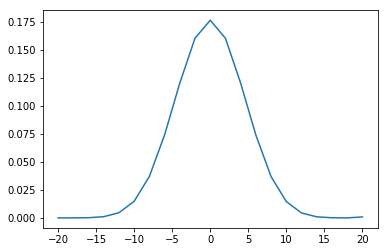

In [102]:
def alpha(tau, i):
    return scipy.special.comb(tau, 1/2*(tau+i))

def beta(tau, leftDisplacement, rightDisplacement):
    return scipy.special.comb((tau - leftDisplacement), 1/2*(tau-leftDisplacement+rightDisplacement))

def calculateLeftDisplacement(N, d, k):
    return N/2 + d - k

def calculateRightDisplacement(N, d, k, i):
    return k+i - N/2 - d

def calculateFApproximation(alpha, beta, tau, i, ld, rd, epsilon):
    return (alpha - beta) * 1/2**(1/2*(tau+i)) * 1/2**(1/2*(tau-i)) + beta * (1-epsilon)**(1/2*(tau-ld+rd)) * epsilon**(tau-ld-rd) * 1/2**ld
    
N = 100
tau = 20
d = 20
k = 60
i = 20
epsilon = 0.01

ld = calculateLeftDisplacement(N, d, k)
rd = calculateRightDisplacement(N, d, k, i)
a = alpha(tau, i)
b = beta(tau, ld, rd)

print(ld)
print(rd)
print(a)
print(b)

vcfa = np.vectorize(calculateFApproximation)
print(calculateFApproximation(a, b, tau, i, ld, rd, epsilon))
x = np.linspace(-20, 20, num=21)
c = []
for xx in x:
    ld = calculateLeftDisplacement(N, d, k)
    rd = calculateRightDisplacement(N, d, k, i=xx)
    a = alpha(tau, xx)
    b = beta(tau, ld, rd)
    c.append(calculateFApproximation(a, b, tau, xx, ld, rd, epsilon))
plt.plot(x, c);

In [96]:
scipy.special.comb(tau, 1/2*(tau+i))
1/2*(tau+i)

17.0